In [2]:
import pandas as pd 

import psana as ps
import numpy as np
import math 
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial as npply
import sys
import os
import h5py
import scipy.stats as st
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter as gf
from sklearn.utils import resample
sys.path.append('/reg/data/ana16/rix/rixlv1519/results/LCLS_LV15_2021/TestCode/EarlyScience/AnalyzeH5/')
from chemRIXSAnalysis import *
from ChemRIXSClasses import *
from filterTools import *
sys.path.append('/reg/data/ana16/rix/rixlv1519/results/LCLS_LV15_2021/Functions/')
from Functions import *
from Load_Scans import *
from raw_data_class import RawData as RDC
from pro_data_class import ProData as PDC


font = {'size'   : 16}
mpl.rc('font', **font)
%matplotlib inline
cmap = plt.cm.get_cmap('terrain').reversed()

Next steps:

Calibrate from mono_encoder to mono_eV

Figure out how to deal with the weird jump at the beginning of mono scans. (look at distribution and then select range before binning maybe?)

Bin shots every 0.2 eV.

Separate into laser on vs laser off. 

Bin laser on into time bins.

Filter things here?




In [3]:
exp = 'rixlv1519'
small_data_folder = '/reg/data/ana01/rix/%s/hdf5/smalldata/' % exp #changeme
scans = [96,98,99,101,102,104] #97 bad, 103 maybe bad? [96,98,99,101,102,104]
# raw = h5py.File(small_data_folder+'%s_Run%04d.h5' % (exp,scans[0]))
# print(list(raw['epicsAll'].keys()))

In [4]:
raw_datas = []
for scan in scans:
    raw_data = load_scans(small_data_folder,exp,scan)
    
    I0_intensities_fim0, I0_specs_fim0, baselines_fim0 = \
    process_fim(raw_data.fim0_raw,np.arange(0,8),np.arange(0,50),np.arange(103,112))
    
    I0_intensities_fim1, I0_specs_fim1, baselines_fim1 = \
    process_fim(raw_data.fim1_raw,np.arange(0,8),np.arange(0,50),np.arange(103,112))
             
    intensities_fim2=process_fim_2(raw_data.fim2_raw,np.arange(0,8))
    
    andor_dir_intensities, andor_dir_specs, baseline_andor_dir = \
    process_andor(raw_data.andor_dir_raw,np.arange(500,800),np.arange(900,1250))
    
#     if raw_data.laser == 1:
#         r = []
        
#     if raw_data.laser == 0:
#         r = []

    raw_data.changeValue(I0_intensities_fim0=I0_intensities_fim0,
                        I0_specs_fim0=I0_specs_fim0,
                        baselines_fim0=baselines_fim0,
                        I0_intensities_fim1=I0_intensities_fim1,
                        I0_specs_fim1=I0_specs_fim1,
                        baselines_fim1=baselines_fim1,
                        intensities_fim2=intensities_fim2,
                        andor_dir_intensities=andor_dir_intensities,
                        andor_dir_specs=andor_dir_specs,
                        baseline_andor_dir=baseline_andor_dir
                        )
    
    
    raw_datas = raw_datas + [raw_data]
print(raw_datas[0].getKeys())

generating mono_encoder_ev
loading TT
loading fim0
loading fim1
loading andor
loading fim2
generating mono_encoder_ev
loading TT
loading fim0
loading fim1
loading andor
loading fim2
generating mono_encoder_ev
loading TT
loading fim0
loading fim1
loading andor
loading fim2
generating mono_encoder_ev
loading TT
loading fim0
loading fim1
loading andor
loading fim2
generating mono_encoder_ev
no TT
loading fim0
loading fim1
loading andor
loading fim2
generating mono_encoder_ev
loading TT
loading fim0
loading fim1
loading andor
loading fim2
dict_keys(['events', 'xgmd', 'gmd', 'energy_raw', 'mono_encoder', 'pitch_raw', 'horz_raw', 'evrs', 'lxt', 'laser', 'nan_cond', 'mono_encoder_ev', 'tt_pos', 'tt_posps', 'tt_posfwhm', 'fim0_raw', 'fim1_raw', 'andor_dir_raw', 'fim2_raw', 'I0_intensities_fim0', 'I0_specs_fim0', 'baselines_fim0', 'I0_intensities_fim1', 'I0_specs_fim1', 'baselines_fim1', 'intensities_fim2', 'andor_dir_intensities', 'andor_dir_specs', 'baseline_andor_dir'])


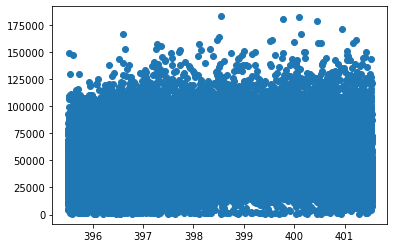

In [5]:
x = 1
plt.close('all')
plt.figure()
plt.scatter(raw_datas[x].mono_encoder_ev,raw_datas[x].andor_dir_intensities)
# plt.plot(raw_datas[0].mono_encoder,raw_datas[0].andor_dir_intensities)

# plt.plot(raw_datas[0].lxt,raw_datas[0].andor_dir_intensities)

#0,2,3,4,5

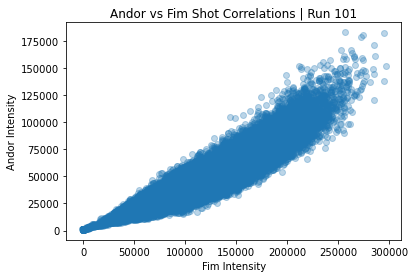

Text(0.5, 1.0, 'Shot Distribution | Fim Intensity | Run 101')

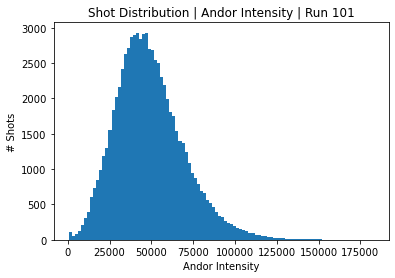

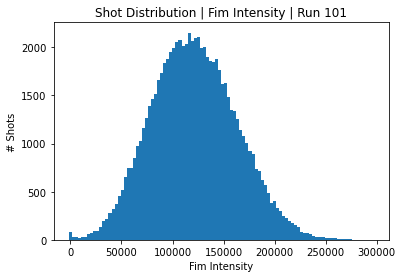

In [6]:
scan = 1
fim0_channels = [4,5,6,7]
fim_0 = np.sum(raw_datas[scan].I0_intensities_fim0[fim0_channels,:],0)
andor = raw_datas[scan].andor_dir_intensities

plt.figure()
plt.scatter(fim_0,andor,alpha=0.3)
plt.xlabel('Fim Intensity')
plt.ylabel('Andor Intensity')
plt.title('Andor vs Fim Shot Correlations | Run 101')
plt.show()


plt.figure()
_, bins, _ = plt.hist(andor, 100)
plt.xlabel('Andor Intensity')
plt.ylabel('# Shots')
plt.title('Shot Distribution | Andor Intensity | Run 101')

plt.figure()
_, bins, _ = plt.hist(fim_0, 100)
plt.xlabel('Fim Intensity')
plt.ylabel('# Shots')
plt.title('Shot Distribution | Fim Intensity | Run 101')

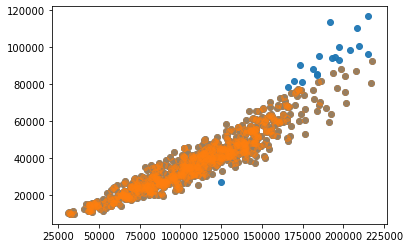

0.09821068503342409
0.09821068503342409
14529.472645450334


/cds/sw/ds/ana/conda2/inst/envs/ps-4.4.4/lib/python3.7/site-packages/ipykernel/__main__.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/cds/sw/ds/ana/conda2/inst/envs/ps-4.4.4/lib/python3.7/site-packages/ipykernel/__main__.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/cds/sw/ds/ana/conda2/inst/envs/ps-4.4.4/lib/python3.7/site-packages/ipykernel/__main__.py:105: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated

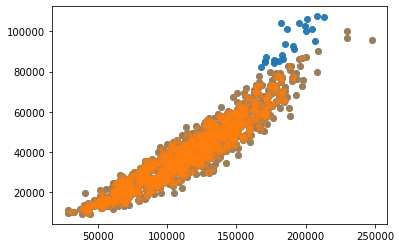

0.10202325759631614
0.10202325759631614
15960.115568964491


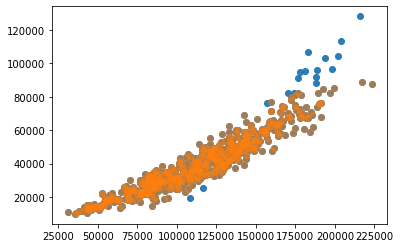

0.10605284622290466
0.10605284622290466
16237.664404430363


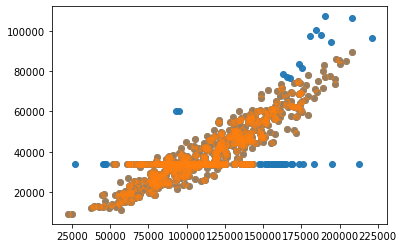

0.13260964690608562
0.13260964690608562
14573.452063774948


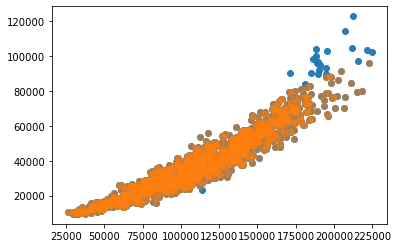

0.10340849692051367
0.10340849692051367
16295.979082560869


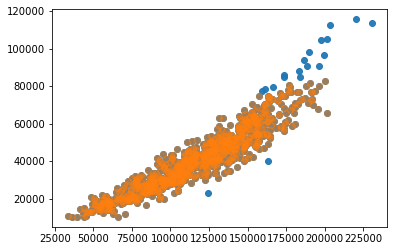

0.10376520412065517
0.10376520412065517
15491.359402001088


In [133]:
plt.close('all')
scans_to_plot = [0,1,2,3,4,5]#,1,2]
n_bins = 70
scan_type = 'mono'


if scan_type is 'time':
    start_bin = 0
    stop_bin = 0.0025
    
if scan_type is 'mono':
    start_bin = 395.5
    stop_bin = 401.5
    
# plt.figure()
to_average = []
fim0_channels = [4,5,6,7]#,5,6,7]#,5,6,7]#,5,6,7]#,5,6,7]#,5,6,7]
# fim1_channels = [5]
for scan in scans_to_plot:
    all_events = raw_datas[scan].events 
    pumped_events = all_events[raw_datas[scan].laser==1]
    unpumped_events = all_events[raw_datas[scan].laser==0]
    if scan_type is 'time':
        x_axis = raw_datas[scan].lxt

    if scan_type is 'mono':
        
        x_axis = raw_datas[scan].mono_encoder_ev
    andor = raw_datas[scan].andor_dir_intensities
    
    
    fim_0 = np.sum(raw_datas[scan].I0_intensities_fim0[fim0_channels,:],0)
    #fim_1 = np.sum(raw_datas[scan].I0_intensities_fim1[fim1_channels,:],0)
    
    all_Izero = fim_0
#     all_Izero = fim_1
#     all_Izero = np.sum(np.array((fim_0,fim_1)),0)
    
#     fim_0 = raw_datas[scan].I0_intensities_fim1[7,:]


    B_condition_1 = bounds_filter(all_Izero/np.max(all_Izero)\
                                        ,[[0.05,0.85],[4]],False) 
    B_condition_2 = bounds_filter(andor/np.max(andor)\
                                        ,[[0.05,0.85],[4]],False) 
    bounds_conditions = B_condition_1 & B_condition_2
    

    x_value = x_axis[np.logical_and(bounds_conditions,np.logical_and(x_axis>=start_bin,x_axis<=stop_bin))]
    y_value = all_Izero[np.logical_and(bounds_conditions,np.logical_and(x_axis>=start_bin,x_axis<=stop_bin))]
    bins, Izero_binned_means, Izero_binned_shots = energy_binning(x_value,y_value,n_bins)

    y_value = andor[np.logical_and(bounds_conditions,np.logical_and(x_axis>=start_bin,x_axis<=stop_bin))]
    bins, andor_binned_means, andor_binned_shots = energy_binning(x_value,y_value,n_bins)

    y_value = all_events[np.logical_and(bounds_conditions,np.logical_and(x_axis>=start_bin,x_axis<=stop_bin))]
    bins, trash, events_binned = energy_binning(x_value,y_value,n_bins)
    
    lin_conditions = []
    plot = False
    for i in range(0,n_bins-1):
            if i is 3:
                plot = True
                
            lin_conditions.append(lin_filter(Izero_binned_shots[i],andor_binned_shots[i]\
                                        ,[0.078,True],plot))
            
            plot = False
    lin_conditions = np.asarray(lin_conditions,dtype=object)

    andor_filt_and_binned = np.asarray([andor_shots[lin_cond] \
                                        for andor_shots,lin_cond in zip(andor_binned_shots,lin_conditions)],dtype=object)
    Izero_filt_and_binned = np.asarray([Izero_shots[lin_cond] \
                                        for Izero_shots,lin_cond in zip(Izero_binned_shots,lin_conditions)],dtype=object)

    
    events_filt_and_binned = np.asarray([events_binned[lin_cond] \
                                        for events_binned,lin_cond in zip(events_binned,lin_conditions)],dtype=object)
    '''andor_filt_and_binned_means = np.asarray([np.mean(x) for x in andor_filt_and_binned])
    izero_filt_and_binned_means = np.asarray([np.mean(x) for x in Izero_filt_and_binned])

    #norm_then_mean = np.asarray([np.mean(x) for x in andor_filt_and_binned/Izero_filt_and_binned])
    #mean_then_norm = np.asarray([np.mean(x)/np.mean(y) for x,y in zip(andor_filt_and_binned,Izero_filt_and_binned)])'''
    
    
    andor_unpumped = []
    andor_pumped = []
    izero_unpumped = []
    izero_pumped = []

    for i in range(0,len(events_filt_and_binned)):
        pumped_condition = [k in pumped_events for k in events_filt_and_binned[i]]
        unpumped_condition = [k in unpumped_events for k in events_filt_and_binned[i]]

        andor_unpumped.append(andor_filt_and_binned[i][unpumped_condition])
        andor_pumped.append(andor_filt_and_binned[i][pumped_condition])

        izero_unpumped.append(Izero_filt_and_binned[i][unpumped_condition])
        izero_pumped.append(Izero_filt_and_binned[i][pumped_condition])
    

    pumped_izero = np.asarray(izero_pumped)
    pumped_andor = np.asarray(andor_pumped)
    
    unpumped_izero = np.asarray(izero_unpumped)
    unpumped_andor = np.asarray(andor_unpumped)
    pumped_spec = np.asarray([np.mean(x) for x in np.asarray(andor_pumped)/np.asarray(izero_pumped)])
    pumped_spec_std = np.asarray([np.std(x) for x in np.asarray(andor_pumped)/np.asarray(izero_pumped)])*2
    #print(np.asarray(np.len(x) for x in np.asarray(andor_pumped)))
    print(np.std((andor_pumped[0])/izero_pumped[0])*2)
    print(pumped_spec_std[0])
    print(np.std(andor_pumped[0]))
    unpumped_spec = np.asarray([np.mean(x) for x in np.asarray(andor_unpumped)/np.asarray(izero_unpumped)])
    unpumped_spec_std = np.asarray([np.std(x) for x in np.asarray(andor_unpumped)/np.asarray(izero_unpumped)])*2
    #print(unpumped_spec_std)
    
#     pumped_spec = np.asarray([np.mean(x)/np.mean(y) for x,y in zip(np.asarray(andor_pumped),np.asarray(izero_pumped))])
#     unpumped_spec = np.asarray([np.mean(x)/np.mean(y) for x,y in zip(np.asarray(andor_unpumped),np.asarray(izero_unpumped))])

    
    to_average.append([pumped_spec,pumped_izero,pumped_andor,unpumped_spec,unpumped_izero,unpumped_andor, pumped_spec_std, unpumped_spec_std])
to_average = np.asarray(to_average)


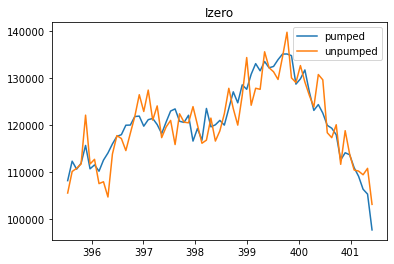

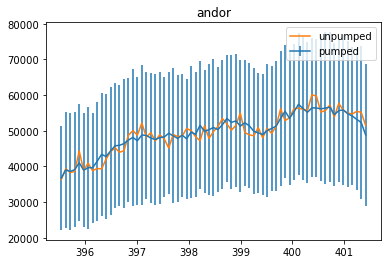

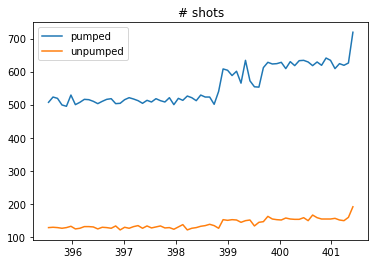

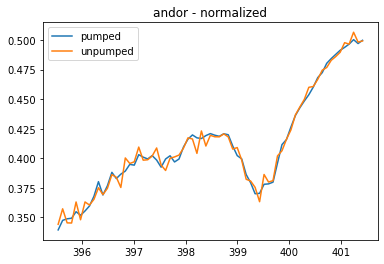

In [93]:
#    to_average.append([pumped_spec,pumped_izero,pumped_andor,unpumped_spec,unpumped_izero,unpumped_andor])

shots_per_bin_pumped = [x.shape[0] for x in to_average[0,1,:]]
shots_per_bin_unpumped = [x.shape[0] for x in to_average[0,4,:]]
izero_pumped = np.asarray([np.mean(x) for x in to_average[0,1,:]])
izero_unpumped = np.asarray([np.mean(x) for x in to_average[0,4,:]])

andor_pumped = np.asarray([np.mean(x) for x in to_average[0,2,:]])
#std=np.asarray([np.std(x) for x in to_average[0,2,:]])
andor_unpumped = np.asarray([np.mean(x) for x in to_average[0,5,:]])


plt.figure()
plt.plot(bins[0:-1],izero_pumped,label='pumped')
plt.plot(bins[0:-1],izero_unpumped,label='unpumped')
plt.title('Izero')
plt.legend()

plt.figure()
plt.plot(bins[0:-1],andor_pumped,label='pumped')
#plt.errorbar(bins[0:-1],andor_pumped,std,label='pumped')
plt.plot(bins[0:-1],andor_unpumped,label='unpumped')
plt.title('andor')
plt.legend()


plt.figure()
plt.plot(bins[0:-1],shots_per_bin_pumped,label='pumped')
plt.plot(bins[0:-1],shots_per_bin_unpumped,label='unpumped')
plt.title('# shots')
plt.legend()


plt.figure()
plt.plot(bins[0:-1],andor_pumped/izero_pumped,label='pumped')
plt.plot(bins[0:-1],andor_unpumped/izero_unpumped,label='unpumped')
plt.title('andor - normalized')
plt.legend()


In [124]:
to_average.shape
# np.mean(to_average[:,0,:],0)

pumped_spec = np.sum(to_average[test,0,:].shape,0)
pumped_spec

test = [0]
shots_pumped = 0
shots_unpumped = 0

for i in test:
    shots_pumped = shots_pumped + sum([x.shape[0] for x in to_average[i,1,:]])
    shots_unpumped = shots_unpumped + sum([x.shape[0] for x in to_average[i,4,:]])

print(str(shots_pumped) + ' pumped shots')
print(str(shots_unpumped) + ' pumped shots')
print(69*515)

38515 pumped shots
9634 pumped shots
35535


In [10]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

In [90]:
test = [0,1]
pumped_spec = np.mean(to_average[test,0,:],0)
ps_std = np.sqrt(np.sum((to_average[test,6,:])**2,0).astype(np.float64))
#ps_std = (np.std(to_average[test,0,:].astype(np.float64),0))
unpumped_spec = np.mean(to_average[test,3,:],0)
ups_std = np.std(to_average[test,3,:].astype(np.float64),0)
print (ps_std)

2
[0.14161244 0.14392831 0.15209775 0.1506085  0.15202537 0.15623092
 0.15625854 0.15364674 0.15444667 0.16044718 0.16199542 0.16021802
 0.15733105 0.15879348 0.15688612 0.15694938 0.1679747  0.1568688
 0.15996804 0.16018182 0.15837786 0.16777123 0.15929807 0.15773094
 0.1473241  0.15540261 0.15364794 0.1560409  0.16199502 0.15848519
 0.15424663 0.14967651 0.1518557  0.15049858 0.14744761 0.14474084
 0.14098811 0.13993452 0.14492835 0.14145739 0.13642429 0.12857779
 0.13131779 0.12468395 0.12531092 0.14259728 0.14241699 0.13901005
 0.13286846 0.12657332 0.11488467 0.12135861 0.11978154 0.11784318
 0.12257763 0.12315652 0.12645019 0.12552957 0.1236109  0.13097658
 0.12559816 0.13313694 0.14240659 0.1364774  0.14323348 0.14479015
 0.15554177 0.1529572  0.16205156]


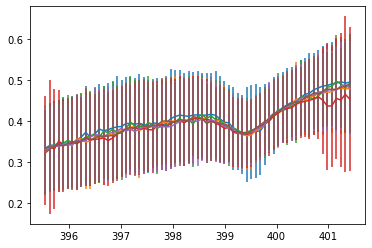

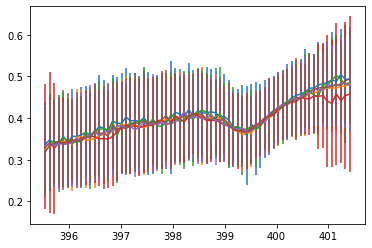

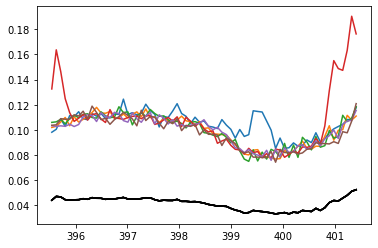

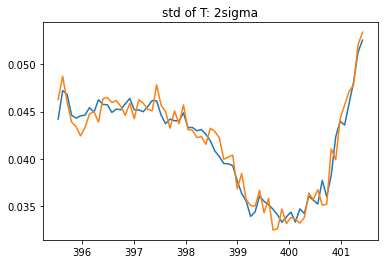

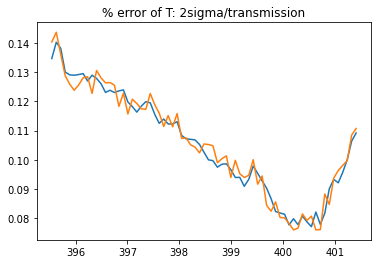

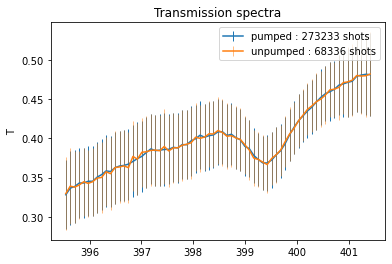

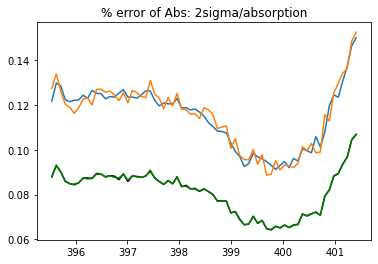

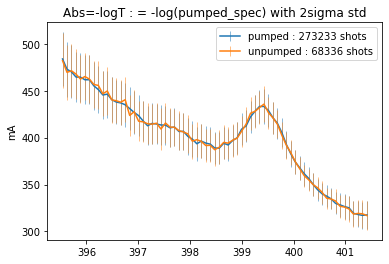

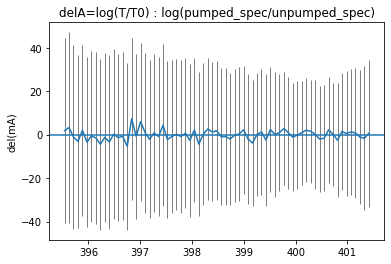

"\n#print(per_err)\nerr_tot=err_tot/len(test)\nplt.figure()\nplt.errorbar(bins[0:-1],err_tot, label='pumped : %d shots' %shots_pumped)\nplt.errorbar(bins[0:-1],err_tot_u, label='unpumped : %d shots' %shots_unpumped)\nplt.legend()\nplt.show()\n\nplt.figure()\nplt.errorbar(bins[0:-1],ps_abs*1000,(err_tot*ps_abs*1000),label='pumped : %d shots' %shots_pumped, elinewidth=0.5)\nplt.errorbar(bins[0:-1],ups_abs*1000,err_tot_u*ups_abs*1000,label='unpumped : %d shots' %shots_unpumped, elinewidth=0.5)\nplt.ylabel('mA')\nplt.title('Abs=-logT : = -log(pumped_spec)  with %err')\nplt.legend()\nplt.show()\n\nplt.figure()\n#plt.plot(bins[0:-1],dAbs*1000)\nplt.errorbar(bins[0:-1],dAbs*1000, abs_perr*dAbs*1000, ecolor='black', elinewidth=0.5)\nplt.ylabel('del(mA)')\nplt.axhline(y=0)\nplt.title('delA=log(T/T0) : log(pumped_spec/unpumped_spec)')\nplt.show()"

In [96]:
test = [0,1,2,3,4,5]

pumped_spec = np.mean(to_average[test,0,:],0)
ps_std = np.sqrt(np.sum((to_average[test,6,:])**2,0).astype(np.float64))/len(test)
#ps_std = np.sum((to_average[test,6,:])**2,0)
#ps_std = (np.std(to_average[test,0,:].astype(np.float64),0))*2
unpumped_spec = np.mean(to_average[test,3,:],0)
ups_std = np.sqrt(np.sum((to_average[test,7,:])**2,0).astype(np.float64))/len(test)
#ups_std = np.std(to_average[test,3,:].astype(np.float64),0)*2
#ups_std = np.sum((to_average[test,7,:])**2,0)
#print(ps_std)
'''
plt.figure()
plt.plot(bins[0:-1],to_average[0,0,:])
plt.plot(bins[0:-1],to_average[1,0,:])
plt.plot(bins[0:-1],to_average[2,0,:])
plt.plot(bins[0:-1],to_average[3,0,:])
plt.plot(bins[0:-1],to_average[test,0,:])
plt.plot(bins[0:-1],to_average[test,0,:])
plt.show()
'''
shots_pumped = 0
shots_unpumped = 0
err_tot=0
err_tot_u=0
for i in test:
    shots_pumped = shots_pumped + sum([x.shape[0] for x in to_average[i,1,:]])
    shots_unpumped = shots_unpumped + sum([x.shape[0] for x in to_average[i,4,:]])
    per_err = np.abs(percentage_error(pumped_spec, to_average[i,0,:]))
    per_err_u = np.abs(percentage_error(unpumped_spec, to_average[i,0,:]))
    err_tot= (err_tot + per_err)
    err_tot_prin=err_tot/(len(test[0:i])+1)
    err_tot_u= (err_tot_u + per_err_u)
    plt.figure(1)
    plt.errorbar(bins[0:-1],to_average[i,0,:],to_average[i,6,:])
    plt.figure(2)
    plt.errorbar(bins[0:-1],to_average[i,3,:],to_average[i,7,:])
    plt.figure(3)
    plt.plot(bins[0:-1],to_average[i,6,:])
    plt.plot(bins[0:-1],ps_std, color='black')
    '''plt.figure()
    plt.errorbar(bins[0:-1],err_tot_prin, color='black', label='average')
    plt.errorbar(bins[0:-1],per_err, label='current 10 min run')
    #plt.errorbar(bins[0:-1],err_tot_u)
    plt.title('percent error for each run')
    plt.legend()
    plt.show()
    print(len(test[0:i])+1)'''
plt.show(1)
plt.show(2)
plt.show(3)
'''
plt.figure()
plt.plot(bins[0:-1],pumped_spec,label='pumped : %d shots' %shots_pumped)
plt.plot(bins[0:-1],unpumped_spec,label='unpumped : %d shots' %shots_unpumped)
plt.ylabel('T')
plt.legend()
plt.show()

plt.figure()
plt.plot(bins[0:-1],pumped_spec-unpumped_spec)
plt.ylabel('delT')
plt.title('delta T : pumped_spec-unpumped_spec')
plt.show()

plt.figure()
plt.plot(bins[0:-1],(pumped_spec-unpumped_spec)/unpumped_spec)
#plt.ylim(-1,1)
plt.ylabel('delT/T')
plt.axhline(y=0)
plt.title('delta T / T : (pumped_spec-unpumped_spec)/unpumped_spec')
plt.show()
'''
ps_abs=-np.log10(pumped_spec.astype(np.float64))
ups_abs=-np.log10(unpumped_spec.astype(np.float64))
totn=(pumped_spec/unpumped_spec)
dAbs=-np.log10(totn.astype(np.float64))
abs_perr=-np.log10(ps_std.astype(np.float64))
#print(dAbs)
ps_abs_std=(-np.log10((pumped_spec-ps_std).astype(np.float64))+np.log10((pumped_spec+ps_std).astype(np.float64)))/2
ups_abs_std=(-np.log10((unpumped_spec-ups_std).astype(np.float64))+np.log10((unpumped_spec+ups_std).astype(np.float64)))/2
delabs_std=np.sqrt((ps_abs_std**2+ups_abs_std**2))/2
dede=np.sqrt((ps_abs_std/ps_abs)**2+(ups_abs_std/ups_abs)**2)/2

plt.figure()
plt.plot(bins[0:-1],ps_std)
plt.plot(bins[0:-1],ups_std)
plt.title('std of T: 2sigma')
plt.show()

plt.figure()
plt.plot(bins[0:-1],ps_std/pumped_spec)
plt.plot(bins[0:-1],ups_std/unpumped_spec)
plt.title('% error of T: 2sigma/transmission')
plt.show()

plt.figure()
plt.errorbar(bins[0:-1],pumped_spec,ps_std,label='pumped : %d shots' %shots_pumped, elinewidth=1)
plt.errorbar(bins[0:-1],unpumped_spec,ups_std,label='unpumped : %d shots' %shots_unpumped, elinewidth=0.5)
plt.ylabel('T')
plt.title('Transmission spectra')
plt.legend()
plt.show()

plt.figure()
plt.plot(bins[0:-1],ps_abs_std/ps_abs)
plt.plot(bins[0:-1],ups_abs_std/ups_abs)
plt.plot(bins[0:-1],delabs_std/ps_abs, color='black')
plt.plot(bins[0:-1],dede, color='g')
plt.title('% error of Abs: 2sigma/absorption')
plt.show()

plt.figure()
plt.errorbar(bins[0:-1],ps_abs*1000,ps_abs_std*ps_abs*1000,label='pumped : %d shots' %shots_pumped, elinewidth=0.5)
plt.errorbar(bins[0:-1],ups_abs*1000,ups_abs_std*ups_abs*1000,label='unpumped : %d shots' %shots_unpumped, elinewidth=0.5)
plt.ylabel('mA')
plt.title('Abs=-logT : = -log(pumped_spec) with 2sigma std')
plt.legend()
plt.show()

plt.figure()
#plt.plot(bins[0:-1],dAbs*1000)
plt.errorbar(bins[0:-1],dAbs*1000, delabs_std*1000, ecolor='black', elinewidth=0.5) #dede*ps_abs
plt.ylabel('del(mA)')
plt.axhline(y=0)
#plt.ylim(-10,10)
plt.title('delA=log(T/T0) : log(pumped_spec/unpumped_spec)')
plt.show()
'''
#print(per_err)
err_tot=err_tot/len(test)
plt.figure()
plt.errorbar(bins[0:-1],err_tot, label='pumped : %d shots' %shots_pumped)
plt.errorbar(bins[0:-1],err_tot_u, label='unpumped : %d shots' %shots_unpumped)
plt.legend()
plt.show()

plt.figure()
plt.errorbar(bins[0:-1],ps_abs*1000,(err_tot*ps_abs*1000),label='pumped : %d shots' %shots_pumped, elinewidth=0.5)
plt.errorbar(bins[0:-1],ups_abs*1000,err_tot_u*ups_abs*1000,label='unpumped : %d shots' %shots_unpumped, elinewidth=0.5)
plt.ylabel('mA')
plt.title('Abs=-logT : = -log(pumped_spec)  with %err')
plt.legend()
plt.show()

plt.figure()
#plt.plot(bins[0:-1],dAbs*1000)
plt.errorbar(bins[0:-1],dAbs*1000, abs_perr*dAbs*1000, ecolor='black', elinewidth=0.5)
plt.ylabel('del(mA)')
plt.axhline(y=0)
plt.title('delA=log(T/T0) : log(pumped_spec/unpumped_spec)')
plt.show()'''

In [104]:
andor_unpumped = []
andor_pumped = []
izero_unpumped = []
izero_pumped = []

for i in range(0,len(events_filt_and_binned)):
    pumped_condition = [k in pumped_events for k in events_filt_and_binned[i]]
    unpumped_condition = [k in unpumped_events for k in events_filt_and_binned[i]]
    
    andor_unpumped.append(andor_filt_and_binned[i][unpumped_condition])
    andor_pumped.append(andor_filt_and_binned[i][pumped_condition])
    
    izero_unpumped.append(Izero_filt_and_binned[i][unpumped_condition])
    izero_pumped.append(Izero_filt_and_binned[i][pumped_condition])
    

pumped_spec = np.asarray([np.mean(x) for x in np.asarray(andor_pumped)/np.asarray(izero_pumped)])
unpumped_spec = np.asarray([np.mean(x) for x in np.asarray(andor_unpumped)/np.asarray(izero_unpumped)])

/cds/sw/ds/ana/conda2/inst/envs/ps-4.4.4/lib/python3.7/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/cds/sw/ds/ana/conda2/inst/envs/ps-4.4.4/lib/python3.7/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [54]:
events_filt_and_binned

array([array([4323497776898937018, 4323497780202213565, 4323497780210602176,
              4323497780218990787, 4323497780227248326, 4323497780235636937,
              4323497780244025548, 4323497780252283087, 4323497780260671698,
              4323497780268929237, 4323497780277317848, 4323497780285706459,
              4323497780293963998, 4323497780310610148, 4323497780318998759,
              4323497780344033520, 4323497780352422131, 4323497780360679670,
              4323497780369068281, 4323497780377456892, 4323497780394103042,
              4323497780402491653, 4323497780410749192, 4323497780419137803,
              4323497780427395342, 4323497780435783953, 4323497780460818714,
              4323497780469207325, 4323497780477464864, 4323497780485853475,
              4323497780502499625, 4323497780510888236, 4323497780519145775,
              4323497780527534386, 4323497780535922997, 4323497780552569147,
              4323497780560826686, 4323497780585861447, 4323497780594250058,

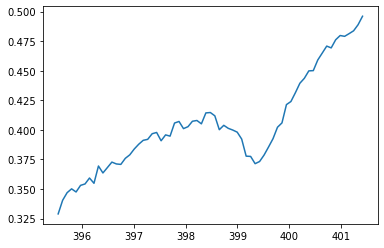

In [99]:
plt.figure()
# plt.plot(bins[0:-1],izero_filt_and_binned_means)
# plt.show()
# plt.plot(bins[0:-1],andor_filt_and_binned_means/np.max(andor_filt_and_binned_means))
plt.plot(bins[0:-1],andor_filt_and_binned_means/izero_filt_and_binned_means)
plt.show()

In [58]:
all_events.shape,pumped_events.shape,unpumped_events.shape


((17212,), (13762,), (3450,))

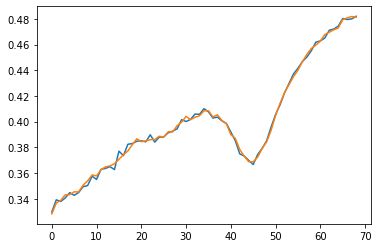

In [98]:
plt.figure()
# plt.plot(izero_filt_and_binned_means)
plt.plot(unpumped_spec)
plt.plot(pumped_spec)

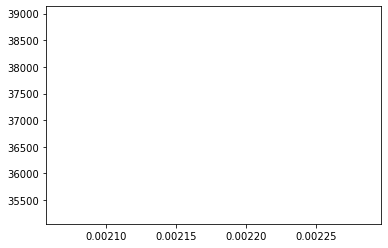

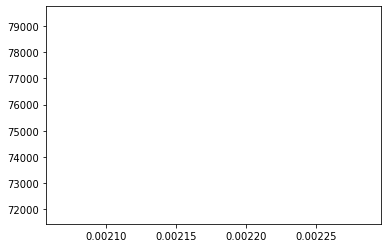

In [93]:
plt.close('all')
# scan = 4
for scan in [1]:
    data = raw_datas[scan]
#     cond = bounds_params[scan].condition
    norm_by = raw_datas[scan].I0_intensities_fim0[7,:]
    all_fims = np.sum(raw_datas[scan].I0_intensities_fim1[[4,6,7],:],0)

    y_value = data.andor_dir_intensities
    y_value = norm_by

    # y_value = np.mean(data.I0_intensities_fim0[4:7,:],0)
    x_value = data.lxt
    n_bins = 75
    bins,intensity,shots = energy_binning(x_value,y_value,n_bins)
    shots_per_bin = np.asarray([i.shape[0] for i in shots])

    plt.figure(15)
    plt.plot(bins[0:-1],intensity)#/np.max(intensity))
    plt.show()
    plt.figure(16)
    # _, bins, _ = plt.hist(shots)#, 100, label='unfiltered')
    plt.plot(bins[0:-1],shots_per_bin)
    plt.show()